In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from wordcloud import WordCloud

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [84]:
df_train = pd.read_csv("../tokenized_dataset/train.csv")
df_test = pd.read_csv("../tokenized_dataset/test.csv")
df_train.head()

,Unnamed: 0,COMMENT_ID,AUTHOR,DATE,CONTENT,VIDEO_NAME,CLASS
0,0,1,Brandon Pryor,2014-01-19 00:36:25,dont even watch anymore come check 2 billion not﻿,PSY - GANGNAM STYLE(?????) M/V,0
1,1,2,Chelsea Yun,2015-05-23 07:17:09.691,hate rap﻿,Eminem - Love The Way You Lie ft. Rihanna,0
2,2,3,Sofia Aristizabal,2014-09-09 00:43:52,"loved , amazing.. omg eyes*_*﻿",Katy Perry - Roar,0
3,3,4,said abdesalam,2015-05-24 07:35:13.754,song bad﻿,Eminem - Love The Way You Lie ft. Rihanna,0
4,4,5,crazy girl,2015-05-23 23:26:05.305,tension⤴︎⤴︎﻿,"LMFAO - Party Rock Anthem ft. Lauren Bennett, ...",0


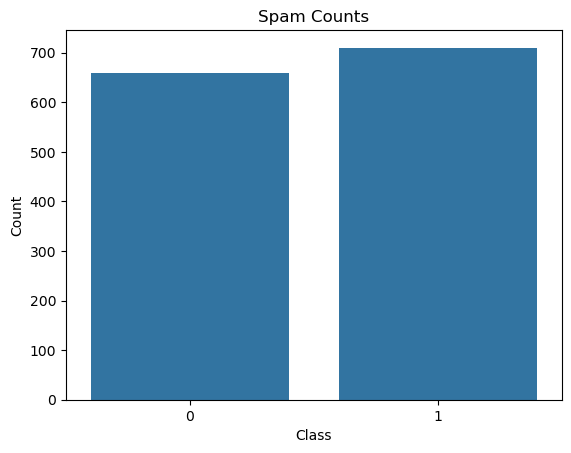

In [57]:
sns.countplot(x=df_train['CLASS'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Spam Counts')
plt.show()

CLASS
0     7.822458
1    20.712676
Name: word_count, dtype: float64


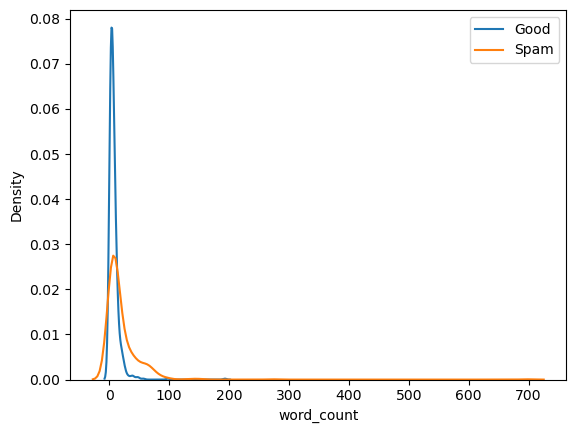

In [58]:
# Store the number of words in each message
df_train['word_count'] = df_train['CONTENT'].str.split().str.len()

# Print the average number of words in each category
print(df_train.groupby('CLASS')['word_count'].mean())

sns.kdeplot(df_train[df_train['CLASS']==0]['word_count'], label='Not Spam')
sns.kdeplot(df_train[df_train['CLASS']==1]['word_count'], label='Spam')
plt.legend()
plt.show()


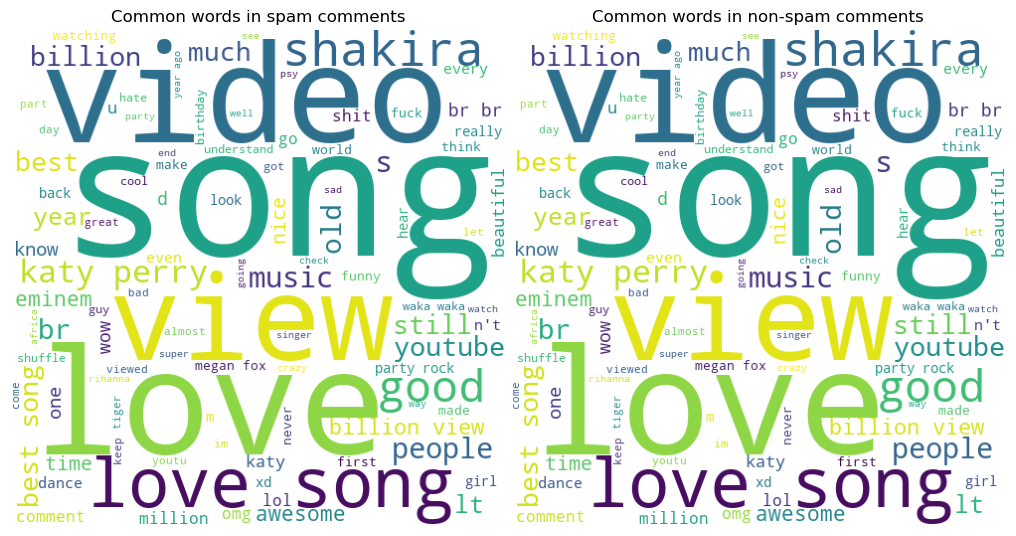

In [59]:
# Get the spam and non-spam messages
spam = df_train[df_train['CLASS']==1]['CONTENT'].str.cat(sep=', ')
not_spam = df_train[df_train['CLASS']==0]['CONTENT'].str.cat(sep=', ')

# Initialize the word cloud
wc1 = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
wc2 = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

# Generate the word clouds
spam_wc = wc1.generate(spam)
not_spam_wc = wc2.generate(not_spam)

# Create subplots for spam and non-spam word clouds
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the word cloud for spam comments
axs[0].imshow(spam_wc)
axs[0].axis("off")
axs[0].set_title("Common words in spam comments")

# Plot the word cloud for non-spam comments
axs[1].imshow(not_spam_wc)
axs[1].axis("off")
axs[1].set_title("Common words in non-spam comments")

# Display the plots
plt.tight_layout(pad=0)
plt.show()


In [85]:
X = df_train['CONTENT']
y = df_train['CLASS']
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=100)


In [86]:
vectorizer = TfidfVectorizer(strip_accents='ascii', ngram_range= (1, 2))
# First fit the vectorizer with our training set
tfidf_train = vectorizer.fit_transform(X_train)

# Now we can fit our test data with the same vectorizer
tfidf_validation = vectorizer.transform(X_validation)

In [87]:
lr_model = LogisticRegression()
lr_l1_model = LogisticRegression(penalty='l1', solver='liblinear')
bnb_model = BernoulliNB()
mnb_model = MultinomialNB()

lr_model.fit(tfidf_train, y_train)
lr_l1_model.fit(tfidf_train, y_train)
bnb_model.fit(tfidf_train, y_train)
mnb_model.fit(tfidf_train, y_train)

MultinomialNB()

In [88]:
lr_validation_predictions = lr_model.predict(tfidf_validation)
lr_l1_validation_predictions = lr_l1_model.predict(tfidf_validation)
bnb_validation_predictions = bnb_model.predict(tfidf_validation)
mnb_validation_predictions = mnb_model.predict(tfidf_validation)

# Calculate accuracy for each model
lr_validation_accuracy = accuracy_score(y_validation, lr_validation_predictions)
lr_l1_validation_accuracy = accuracy_score(y_validation, lr_l1_validation_predictions)
bnb_validation_accuracy = accuracy_score(y_validation, bnb_validation_predictions)
mnb_validation_accuracy = accuracy_score(y_validation, mnb_validation_predictions)

# Print the accuracy scores
print(f'Logistic Regression Accuracy: {lr_validation_accuracy:.4f}')
print(f'Logistic Regression (L1 regularization) Accuracy: {lr_l1_validation_accuracy:.4f}')
print(f'BernoulliNB Accuracy: {bnb_validation_accuracy:.4f}')
print(f'MultinomialNB Accuracy: {mnb_validation_accuracy:.4f}')

Logistic Regression Accuracy: 0.9489
Logistic Regression (L1 regularization) Accuracy: 0.9051
BernoulliNB Accuracy: 0.6825
MultinomialNB Accuracy: 0.9197


Logistic Regression Accuracy: 0.9489
Confusion Matrix for Logistic Regression:
[[124   3]
 [ 11 136]]
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       127
           1       0.98      0.93      0.95       147

    accuracy                           0.95       274
   macro avg       0.95      0.95      0.95       274
weighted avg       0.95      0.95      0.95       274

Logistic Regression ROC AUC Score: 0.9853


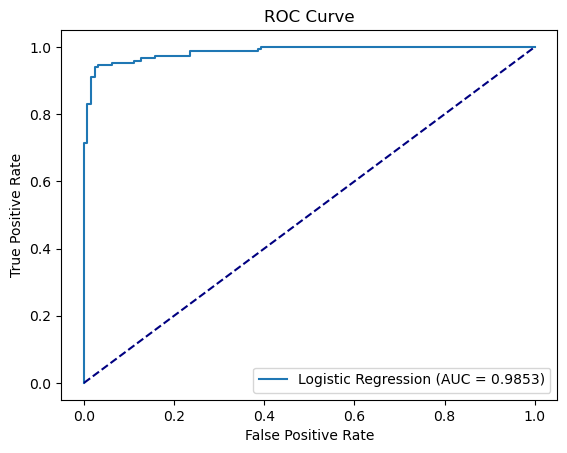

In [89]:
# Accuracy
lr_validation_accuracy = accuracy_score(y_validation, lr_validation_predictions)
print(f'Logistic Regression Accuracy: {lr_accuracy:.4f}')

# Confusion Matrix
lr_cm = confusion_matrix(y_validation, lr_validation_predictions)
print('Confusion Matrix for Logistic Regression:')
print(lr_cm)

# Classification Report
lr_classification_report = classification_report(y_validation, lr_validation_predictions)
print('Classification Report for Logistic Regression:')
print(lr_classification_report)

# ROC and AUC
lr_roc_auc = roc_auc_score(y_validation, lr_model.predict_proba(tfidf_validation)[:,1])
print(f'Logistic Regression ROC AUC Score: {lr_roc_auc:.4f}')

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_validation, lr_model.predict_proba(tfidf_validation)[:,1])
plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {lr_roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [90]:
# Perform 10-fold cross-validation for each model
lr_cv_scores = cross_val_score(lr_model, tfidf_train, y_train, cv=10, scoring='accuracy')
bnb_cv_scores = cross_val_score(bnb_model, tfidf_train, y_train, cv=10, scoring='accuracy')
mnb_cv_scores = cross_val_score(mnb_model, tfidf_train, y_train, cv=10, scoring='accuracy')

print(f'Logistic Regression CV Accuracy: {lr_cv_scores.mean():.4f}')
print(f'BernoulliNB CV Accuracy: {bnb_cv_scores.mean():.4f}')
print(f'MultinomialNB CV Accuracy: {mnb_cv_scores.mean():.4f}')

Logistic Regression CV Accuracy: 0.9343
BernoulliNB CV Accuracy: 0.7014
MultinomialNB CV Accuracy: 0.9160


In [91]:
X_train = df_train['CONTENT']
y_train = df_train['CLASS']
X_test_submission = df_test['CONTENT']

vectorizer_prediction = TfidfVectorizer(strip_accents='ascii', ngram_range= (1, 2))

tfidf_prediction_train = vectorizer_prediction.fit_transform(X_train)
tfidf_prediction_test = vectorizer_prediction.transform(X_test_submission)

In [92]:
lr_prediction_model = LogisticRegression()
lr_prediction_model.fit(tfidf_prediction_train, y_train)
lr_predictions_submission = lr_prediction_model.predict(tfidf_prediction_test)

In [93]:
sol = pd.read_csv("../sample_submission.csv")
sol['CLASS'] = lr_predictions_submission
sol.head()
sol.to_csv("lr_prediction.csv", index=False)